In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt


In [3]:
config_file=r'C:\Users\owner\OneDrive\Documents\Machine vision\iotiot\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model=r'C:\Users\owner\OneDrive\Documents\Machine vision\iotiot\ssd_mobilenet_v3_large_coco_2020_01_14\frozen_inference_graph.pb'

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
class_labels=[]
file_name=r'C:\Users\owner\OneDrive\Documents\Machine vision\iotiot\Labels.txt'
with open(file_name,'rt') as fpt:
    class_labels=fpt.read().rstrip('\n').split('\n')

## another way is class_labels.append(fpt.read())

In [6]:
print(class_labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
len(class_labels)

80

In [8]:
img=cv2.imread(r'C:\Users\owner\OneDrive\Documents\Machine vision\iotiot\LeaseOffers_Standard_Details.jpg')

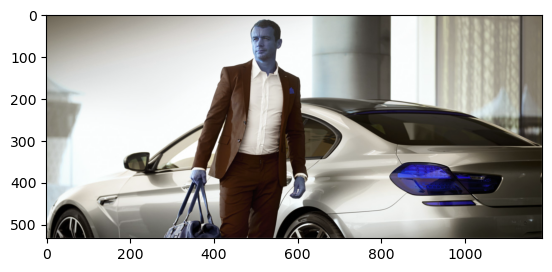

In [9]:
plt.imshow(img)

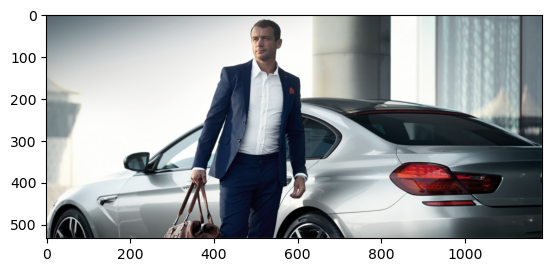

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001A873D4C7F0>

In [12]:
ClassIndex, confidence, bbox=model.detect(img, confThreshold=0.5)

In [13]:
print(ClassIndex)

[3 1]


In [14]:
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN
for class_inx, conf, boxes in zip(ClassIndex, confidence, bbox):
    cv2.rectangle(img, boxes, (255,0,0),2)
    cv2.putText(img, class_labels[class_inx-1],(boxes[0]+10,boxes[1]+40), font, font_scale, color=(0,255,0), thickness=2)


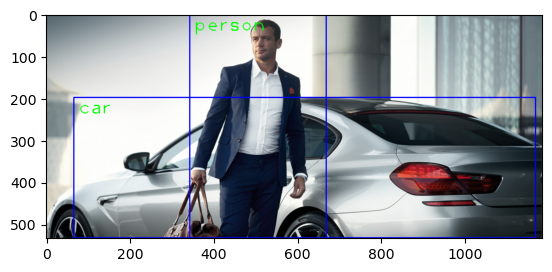

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
cap=cv2.VideoCapture(r'F:\nokia 6.1\wastsappvideos\VID-20210715-WA0000.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale=3
font= cv2.FONT_HERSHEY_PLAIN
while True:
    ret, frame=cap.read()
    ClassIndex, confidence, bbox=model.detect(frame, confThreshold=0.5)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for class_inx, conf, boxes in zip(ClassIndex, confidence, bbox):
            if (class_inx<=80):
                cv2.rectangle(frame, boxes, (255,0,0),2)
                cv2.putText(frame, class_labels[class_inx-1],(boxes[0]+10,boxes[1]+40), font, font_scale, color=(0,255,0), thickness=2)
    cv2.imshow('Object Detection Tutorial', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
                
        
        

                     

[ 1  1  3  1 15]
[ 1  3  1  1 15]
[ 1  3  1 15]
[ 1  3  1 15]
[ 3  1 15]
[ 3  1 15]
[ 3 15  1  1]
[3 1]
[3 1]
[3 1]
[1 3]
[1 3 1]
[1 3 1]
[1 3 1]
[ 1  3  1  1 42]
[1 3 1 1]
[1 3 1 1 1]
[ 1  3  1 15  1]
[ 1  3 15  1]
[ 1  3 15  1 42]
[ 1  3  1 15]
[ 1  3 15]
[ 1 15  3]
[ 1 15  3  1]
[ 1 15  3  1]
[ 1  3 15 31  1]
[ 1  3 15  1 31]
[ 1  3  1 31]
[ 1  1  3 31]
[ 1  1  3 31]
[1 1 3]
[1 1 3]
[ 1  1  3 15]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 3]
[1 3 1 1 1]
[3 1 1 1 1]
[1 1 3 1 1]
[1 1 1 3]
[1 1 1 3]
[1 1 1 3 1]
[1 1 1 3 1]
[ 1  1  1  3 77  1]
[1 1 1 1 1 1 3 1]
[1 1 1 1 1 3 1]
[1 1 3 1 1 1]
[1 1 3 1 1]
[1 1 3 1 1 1]
[1 1 3 1 1 1]
[1 1 3 1 1 1 1 1]
[1 1 3 1 1 1 1]
[ 1  1  3  1  1 77]
[1 1 3 1 1 1]
[1 3 1 1 1]
[ 1  3  1  1  1 77]
[1 3 1 1 1]
[1 3 1 1 1]
[1 3 1 1 1]
[1 1 3 1 1 1]
[1 3 1 1 1 1]
[1 3 1 1]
[1 1 3 1 1]
[1 3 1]
[1 3 1 1]
[1 3 1 1]
[1 1 3 1]
[1 3 1 1]
[1 3 1 1]
[1 3 1 1 1]
[1 3 1 1]
[1 3 1]
[1 3 1 1]
[1 1 3 1]
[1 1 3]
[1 1 3 1]
[1 1 3 1]
[1 1 1 3 1]
[1 1 3 1]
[1 1 3 1]
[1 1 3 1]
[1 1 1 3]
[1 

[85 15  1 28  1]
[ 1 15 28]
[15  1 28 85]
[15  1 28]
[28 15  1]
[ 1 28]
[1 1 1]
[1]
[1]
[ 1 62  1 28]
[1 1 1]
[1 1 1 1 1]
[ 1  1  1  1 28]
[ 1  1  1  1 28  1]
[ 1  1  1  1 28]
[ 1  1  1 62 28  1  1 62]
[ 1  1  1  1 28 62]
[ 1 62  1 28 62  1 62  1]
[ 1 62 62 28 62  1  1]
[28 62  1 62 62 28  1]
[62 62 28 62 28  1  1]
[28 62 62 62 28  1  1]
[28 62 62 62  1 15  1 28 15]
[28  1  1 62 62 62 15 28]
[62 15 62 28 62 28 15  1  1 62]
[62 62 15 28 62 28  1 15  1 15  1 62]
[62  1 15 28 62 62  1 28  1  1 62 15 15]
[62 62 15 28 28 62  1  1  1 62  1 15 15]
[15 28 28 62  1 62  1  1  1 62 62]
[62 15 28 28  1  1  1 62 62  1 62 85]
[15 62 62 62 28 28 62  1 85  1 15]
[15 62 28 28 62 62  1  1 15 85  1 62]
[28 15 62 85  1  1  1 28 62 62 62]
[28 62 62 85  1 28 15  1 62]
[28 15 62 62  1 28 62  1 85]
[15 28 62 62 62]
[28 62 15 62  1 28]
[62 28 62 15 62]
[28 62 15 62 15 62]
[28 15 62 62 15  1]
[ 1 28  1  1]
[ 1  1 28 15 28  1  1 62]
[62  1 15 62 62 28  1  1 28]
[ 1 62 62 28  1 62 15 85 62  1  1]
[ 1 62  1 85 62 

[ 3 21 19]
[ 3 21 19]
[ 3 21 19]
[ 3 21 19]
[ 3 21 19]
[ 3 21 22 19]
[ 3 21 22]
[ 3 22 21]
[ 3 21 22 19]
[ 3 19 22 21  1]
[ 3 19  1 21]
[ 3 21  1 19]
[ 3 21 19  1]
[ 3 21 19]
[ 3 21 19]
[ 3 21 19]
[ 3 21]
[ 3 21]
[ 3 21]
[ 3 21]
[ 3 21]
[ 3 21  9]
[3 9]
[3 9]
[ 3  9 21]
[3 9]
[3 9]
[3 9 1]
[ 3  9 19  1 21]
[ 3  9 21]
[3 9 1]
[ 3 19  1 21  9]
[3 9]
[3 9]
[3 9]
[ 3 21]
[ 3 21]
[3]
[3 8]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[ 3 21  9  1]
[3]
[3 9]
[3]
[3]
[3]
[3]
[3 9]
[3]
[3]
[3]
[3]
[3]


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
